<a href="https://colab.research.google.com/github/DucLeTrong/pytorch_review/blob/master/pytorcg_nn/nn_data_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [0]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


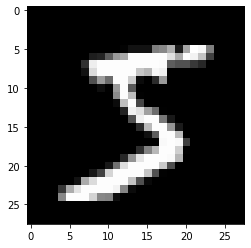

In [3]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [0]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [0]:
from torch.utils.data import TensorDataset

In [9]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [0]:
train_ds = TensorDataset(x_train, y_train)

In [0]:
bs = 64
lr = 0.5
epochs = 2
n,c = x_train.shape

In [0]:
import torch.nn.functional as F
loss_func = F.cross_entropy

In [0]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(784,10)
    def forward(self, xb):
        return self.linear(xb)

In [0]:
model = MyModel()

In [0]:
opt = torch.optim.SGD(model.parameters(), lr=lr)

In [0]:
def fit():
    for epoch in range(epochs):
        for i in range((n-1)//bs +1):
            start_i = i*bs
            end_i = i*bs + bs
            xb,yb = train_ds[start_i: end_i]
            y_pred = model(xb)
            loss = loss_func(y_pred, yb)
            if i % 10 == 0:
                print(loss)
            loss.backward()
            opt.step()
            opt.zero_grad()


In [26]:
fit()

tensor(2.2683, grad_fn=<NllLossBackward>)
tensor(0.9265, grad_fn=<NllLossBackward>)
tensor(0.6948, grad_fn=<NllLossBackward>)
tensor(0.4651, grad_fn=<NllLossBackward>)
tensor(0.4110, grad_fn=<NllLossBackward>)
tensor(0.4150, grad_fn=<NllLossBackward>)
tensor(0.3046, grad_fn=<NllLossBackward>)
tensor(0.3580, grad_fn=<NllLossBackward>)
tensor(0.7591, grad_fn=<NllLossBackward>)
tensor(0.2992, grad_fn=<NllLossBackward>)
tensor(0.3145, grad_fn=<NllLossBackward>)
tensor(0.2989, grad_fn=<NllLossBackward>)
tensor(0.3537, grad_fn=<NllLossBackward>)
tensor(0.2619, grad_fn=<NllLossBackward>)
tensor(0.3208, grad_fn=<NllLossBackward>)
tensor(0.2718, grad_fn=<NllLossBackward>)
tensor(0.3736, grad_fn=<NllLossBackward>)
tensor(0.2848, grad_fn=<NllLossBackward>)
tensor(0.6225, grad_fn=<NllLossBackward>)
tensor(0.4652, grad_fn=<NllLossBackward>)
tensor(0.2967, grad_fn=<NllLossBackward>)
tensor(0.2352, grad_fn=<NllLossBackward>)
tensor(0.4513, grad_fn=<NllLossBackward>)
tensor(0.5933, grad_fn=<NllLossBac